# A Complete EDA and Visualization of Text Data

Visually representing the content of a text document is one of the most important tasks in the field of text mining. As a data scientist or NLP specialist, not only we explore the content of documents from different aspects and at different levels of details, but also we summarize a single document, show the words and topics, detect events, and create storylines.

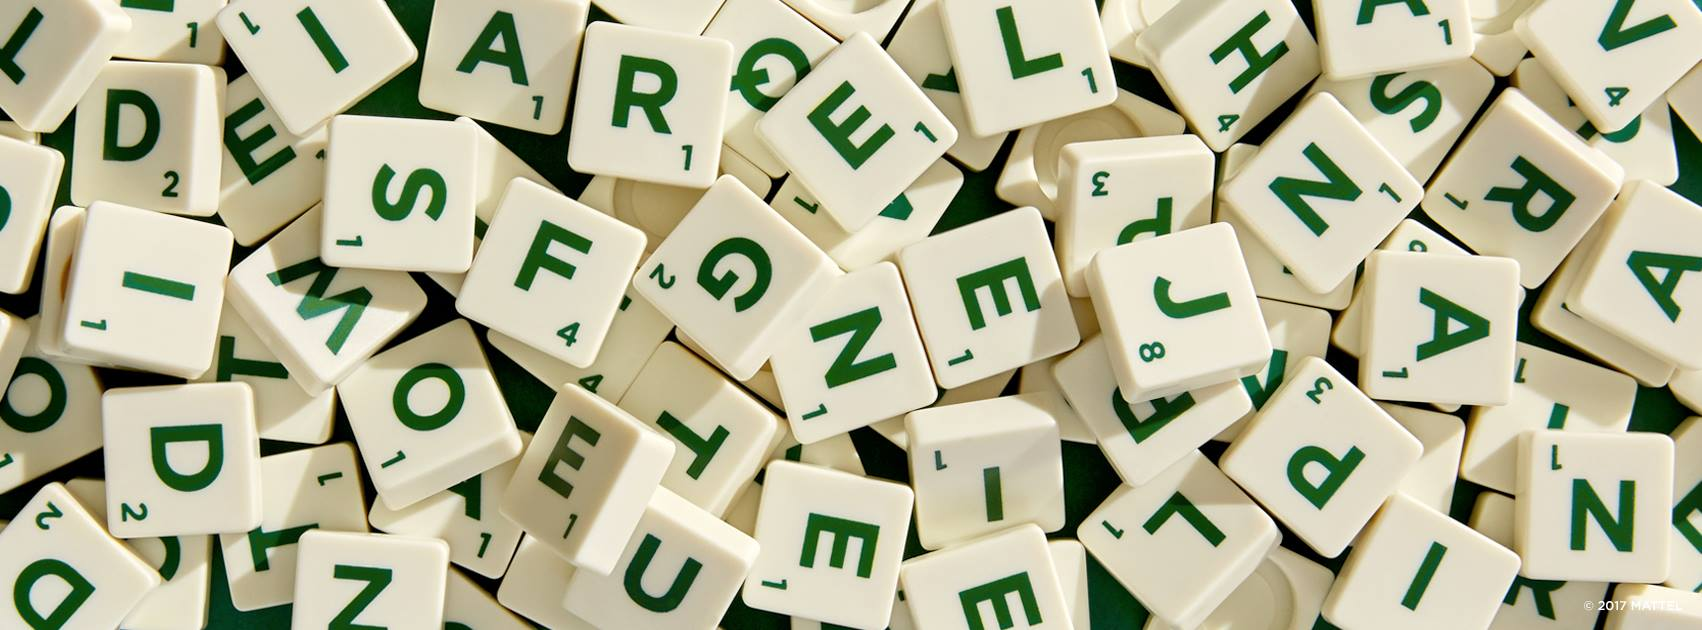

we will use Womens Clothing E-Commerce Reviews data set, and try to explore and visualize as much as we can, using Plotly’s Python graphing library and Bokeh visualization library. Not only we are going to explore text data, but also we will visualize numeric and categorical features.
Let’s get started!

## Dataset

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* <b>Clothing ID:</b> Integer Categorical variable that refers to the specific piece being reviewed.
* <b>Age:</b> Positive Integer variable of the reviewers age.
* <b>Title:</b> String variable for the title of the review.
* <b>Review Text:</b> String variable for the review body.
* <b>Rating:</b> Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* <b>Recommended IND:</b> Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* <b>Positive Feedback Count:</b> Positive Integer documenting the number of other customers who found this review positive.
* <b>Division Name:</b> Categorical name of the product high level division.
* <b>Department Name:</b> Categorical name of the product department name.
* <b>Class Name:</b> Categorical name of the product class name.

## Import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Let's remove null values and unnecessary columns

In [3]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [4]:
df.drop(['Unnamed: 0', 'Title'], axis=1, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

## Preprocess the data

In [5]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

Using [TextBlob](https://textblob.readthedocs.io/en/dev/) to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

and also calculating word counts and review length. 

In [6]:
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x: len(str(x)))

## Let's check most Postive, Neutral and Negative polarity reviews

### Polarity == 1

In [7]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Bought this dress for an indian wedding- it was perfect!
Fits perfect!
If there ever was the perfect feminine dress, this would be it .
So comfortable-so versatile-so perfect
I love it!!! i can wear out to dinner or just out to lunch with
friends!


### Polarity == 0

In [8]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Wish this site had "ask a question about the product" feature like amazon does. just wondering if anyone has seen this product in person to verify color? it looks orange but descriptor says red. would appreciate feedback. thank you for your help.
I bought the mosaic pattern in a small. the pattern and colors look much better in person. the design and quality are solid. the top runs small. it is difficult to put on, but stays in place. i would recommend.
I have several of goodhyouman shirts and i get so many compliments on them. especially the one that says forehead kisses are underrated. don't hesitate. buy this shirt. you won't be sorry.....
Like the extra details on the neck and back - and it's versatile to wear everywhere
Very sheer inexpensive material. even on sale i'm returning it


### Polarity <= -0.7

In [9]:
cl = df.loc[df.Polarity <= -0.7, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Awful color, horribly wrinkled and just a mess...so disappointed
Cut out design, no seems or hems.
 very disappointed in retailer
What a disappointment and for the price, it's outrageous!
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse
The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(


## Distribution of review sentiment polarity score

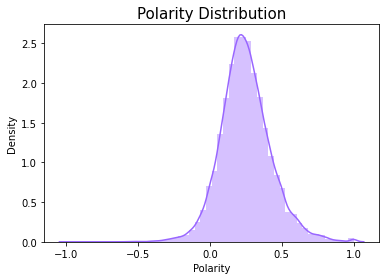

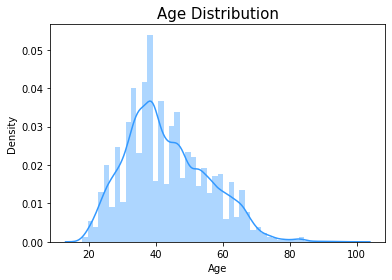

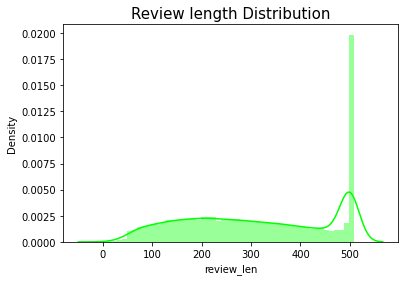

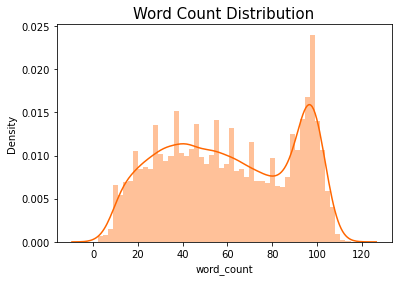

In [10]:
features = ['Polarity', 'Age', 'review_len', 'word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

for feature, title, color in zip(features, titles, colors): 
    sns.distplot(x=df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

1. **Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.**
2. **Most reviewers are in their 30s to 40s.**

## Distribution of review ratings

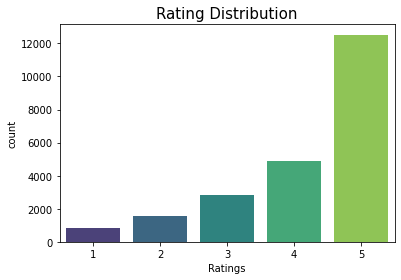

In [11]:
sns.countplot(x = 'Rating', palette='viridis', data=df)
plt.title('Rating Distribution', size=15)
plt.xlabel('Ratings')
plt.show()

**The ratings are in align with the polarity score, that is, most of the ratings are pretty high at 4 or 5 ranges.**

## Distribution by Division Name

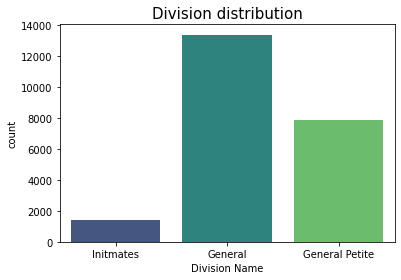

In [12]:
sns.countplot(x='Division Name', palette='viridis', data=df)
plt.title('Division distribution', size=15)
plt.show()

**General division has the most number of reviews, and Initmates division has the least number of reviews.**

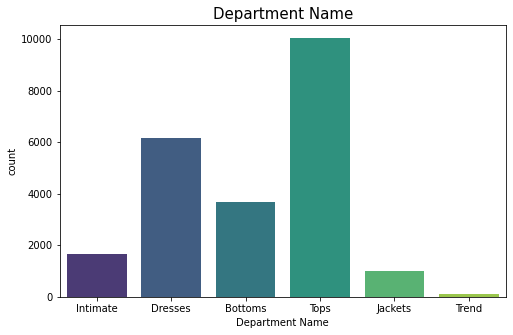

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department Name', palette='viridis', data=df)
plt.title('Department Name', size=15)
plt.show()

## Distribution of Class

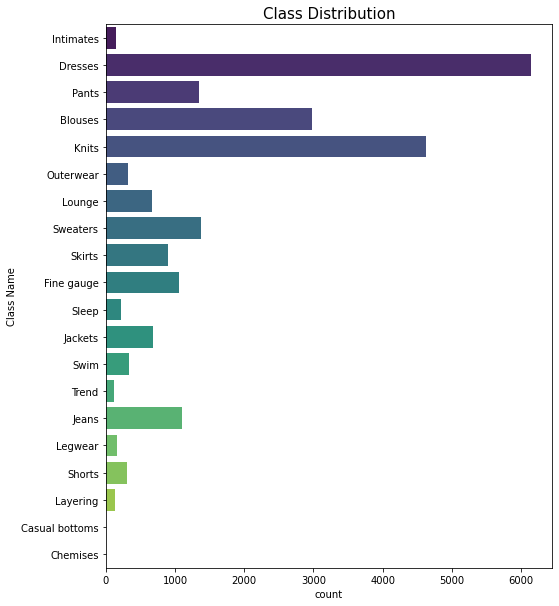

In [14]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='viridis', data=df)
plt.title('Class Distribution', size=15)
plt.show()

## Unigrams, Bigrams and Trigrams

Now we come to “Review Text” feature, before explore this feature, we need to extract N-Gram features. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. In order to do this, we use scikit-learn’s [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) function.

First, it would be interesting to compare unigrams before and after removing stop words.

In [15]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [16]:
stop_words = None
n = 20
unigrams = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

In [17]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

## Unigrams Distribution

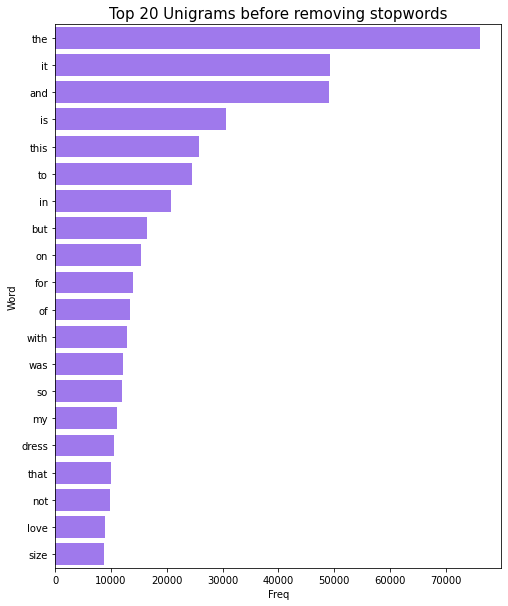

In [18]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams)
plt.title('Top 20 Unigrams before removing stopwords', size=15)
plt.show()

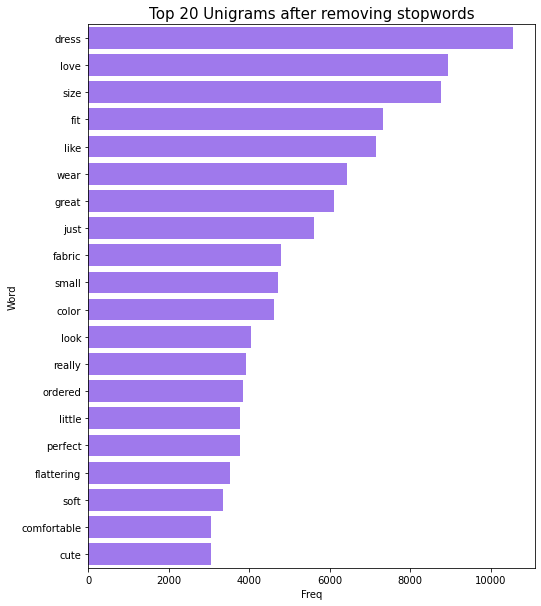

In [19]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Bigrams Distribution

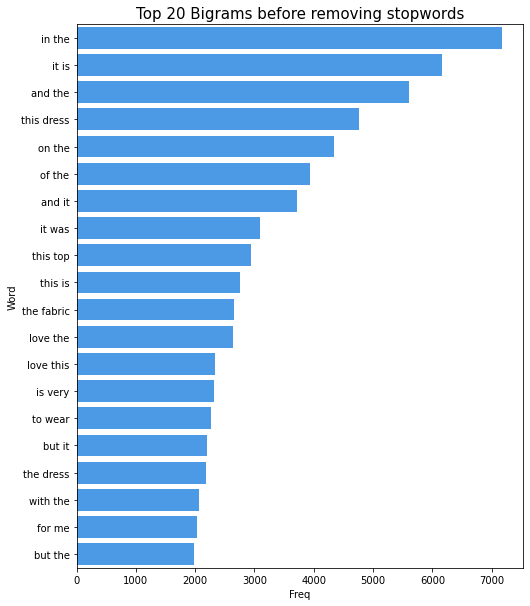

In [20]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams)
plt.title('Top 20 Bigrams before removing stopwords', size=15)
plt.show()

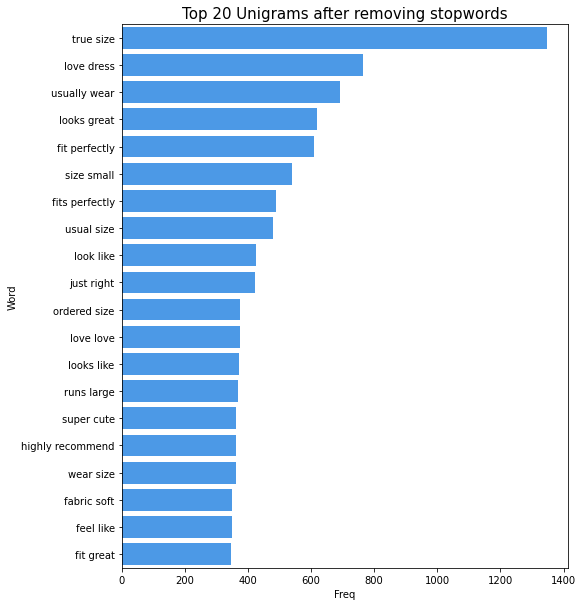

In [21]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Trigrams Distribution

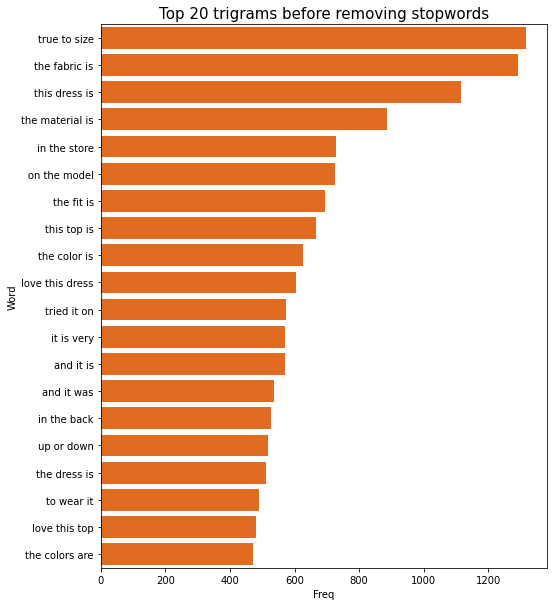

In [22]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
plt.title('Top 20 trigrams before removing stopwords', size=15)
plt.show()

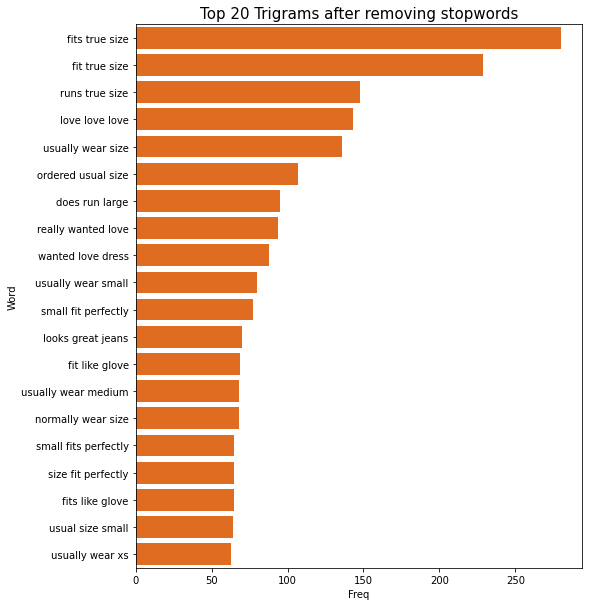

In [23]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams_st)
plt.title('Top 20 Trigrams after removing stopwords', size=15)
plt.show()

## Part-of-Speech Tagging (POS)

Part-Of-Speech Tagging (POS) is a process of assigning parts of speech to each word, such as noun, verb, adjective, etc

I am using a simple TextBlob API to dive into POS of our “Review Text” feature in our data set, and visualize these tags.

In [24]:
blob = TextBlob(str(df['Review Text']))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
#top_pos = pd.DataFrame(pos_df['pos'].value_counts(), columns=['pos', 'count'])
top_pos = pos_df['pos'].value_counts()

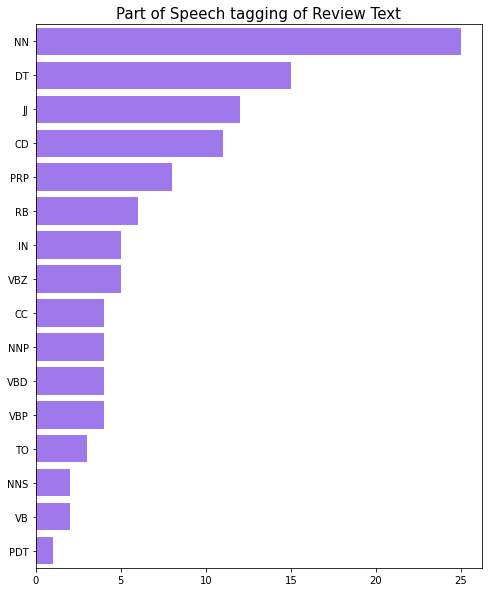

In [25]:
plt.figure(figsize=(8, 10))
sns.barplot(y=top_pos.index, x=top_pos.values, color=colors[0])
plt.title('Part of Speech tagging of Review Text', size=15)
plt.show()

## Department name v/s Sentiment Polarity

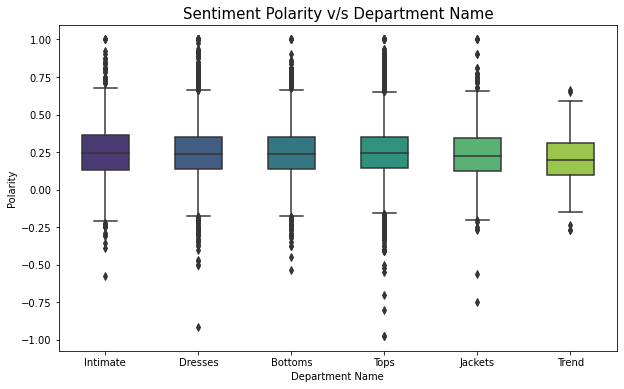

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity v/s Department Name', size=15)
plt.show()

The highest sentiment polarity score was achieved by all of the six departments except Trend department, and the lowest sentiment polarity score was collected by Tops department. And the Trend department has the lowest median polarity score. If you remember, the Trend department has the least number of reviews. This explains why it does not have as wide variety of score distribution as the other departments.

## Departments Name v/s Rating

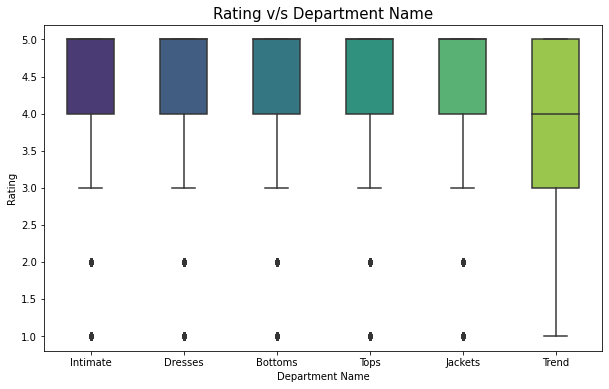

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Rating', width=0.5, palette='viridis', data=df)
plt.title('Rating v/s Department Name', size=15)
plt.show()

Except Trend department, all the other departments’ median rating were 5. Overall, the ratings are high and sentiment are positive in this review data set.

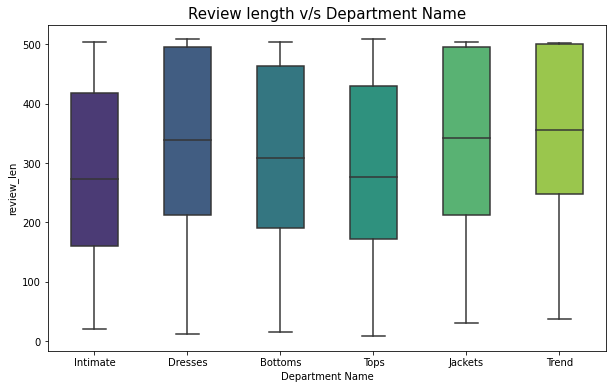

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='review_len', width=0.5, palette='viridis', data=df)
plt.title('Review length v/s Department Name', size=15)
plt.show()

The median review length of Tops & Intimate departments are relative lower than those of the other departments.

## Distribution of Sentiment polarity of reviews based on Recommendation

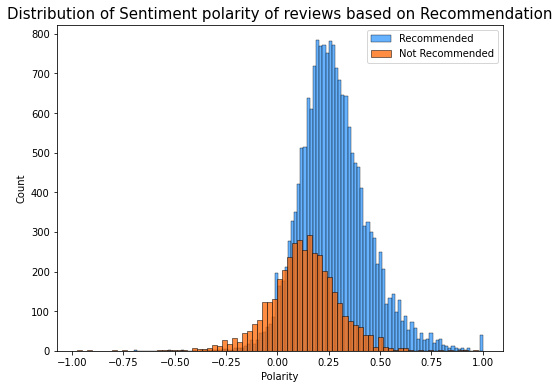

In [29]:
recommended = df.loc[df['Recommended IND'] == 1, 'Polarity']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Polarity']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], label='Recommended')
sns.histplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Sentiment polarity of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

**It is obvious that reviews have higher polarity score are more likely to be recommended.**

## Distribution of Rating of reviews based on Recommendation

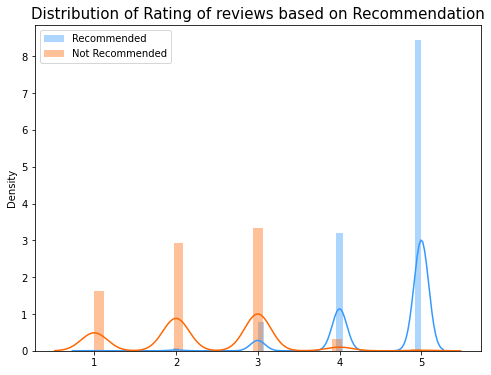

In [30]:
recommended = df.loc[df['Recommended IND'] == 1, 'Rating']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Rating']

plt.figure(figsize=(8, 6))
sns.distplot(x=recommended, color=colors[1], label='Recommended', )
sns.distplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Rating of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

## Distribution of Review length of reviews based on Recommendation

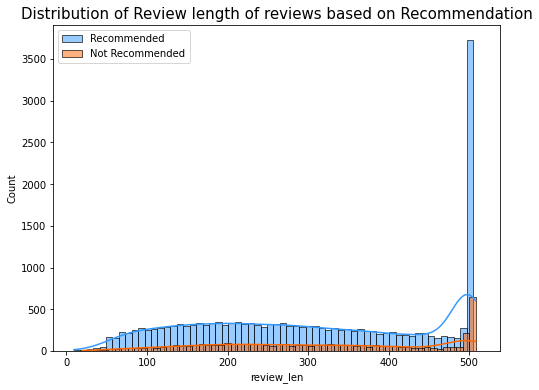

In [31]:
recommended = df.loc[df['Recommended IND'] == 1, 'review_len']
not_recommended = df.loc[df['Recommended IND'] == 0, 'review_len']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], kde=True, label='Recommended', binwidth=8)
sns.histplot(x=not_recommended, color=colors[3], kde=True, label='Not Recommended', binwidth=8)
plt.title('Distribution of Review length of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

**Recommended reviews tend to be lengthier than those of not recommended reviews.**

## 2D Density jointplot of rating and sentiment polarity

<Figure size 576x576 with 0 Axes>

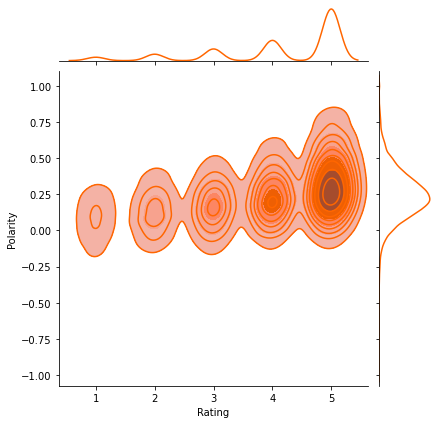

In [32]:
plt.figure(figsize=(8, 8))
g = sns.jointplot(x='Rating', y='Polarity', kind='kde', color=colors[3], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[3], zorder=0, levels=6)

plt.show()

## 2D Density jointplot of age and sentiment polarity

<Figure size 720x576 with 0 Axes>

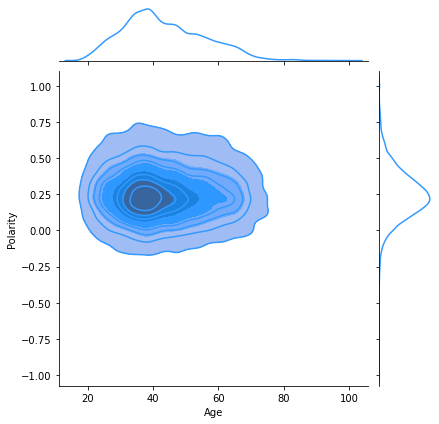

In [33]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(x='Age', y='Polarity', kind='kde', color=colors[1], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[1], zorder=0, levels=6)
plt.show()

**There were few people are very positive or very negative. People who give neutral to positive reviews are more likely to be in their 30s. Probably people at these age are likely to be more active.**

#### Please Upvote this notebook if you find useful and give feedback